# Network Analysis

<img src="https://researchmethods117203719.files.wordpress.com/2018/04/socialnetwork.jpg" />

Network analysis is an unsupervised analysis technique that find relationships (edges) between different entities (nodes). The analysis is based on <b>Graph Theory</b> concepts

In [2]:
library(igraph)
library(dplyr)

In [3]:
### dataset
df <- read.csv(file="https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat")
head(df)

,X2B,X410,AER,X2965,KZN,X2990,X,X0,CR2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,2B,410,ASF,2966,KZN,2990,,0,CR2
2,2B,410,ASF,2966,MRV,2962,,0,CR2
3,2B,410,CEK,2968,KZN,2990,,0,CR2
4,2B,410,CEK,2968,OVB,4078,,0,CR2
5,2B,410,DME,4029,KZN,2990,,0,CR2
6,2B,410,DME,4029,NBC,6969,,0,CR2


In [4]:
### companies flight counts
df %>% group_by(X2B) %>% tally() %>% arrange(desc(n)) %>% head(20)

X2B,n
<chr>,<int>
FR,2484
AA,2354
UA,2180
DL,1981
US,1960
CZ,1454
MU,1263
CA,1260
WN,1146


In [5]:
df %>% group_by(X2B) %>% tally() %>% filter(between(n,50,100)) %>% arrange(n) %>% head(20)

X2B,n
<chr>,<int>
9N,50
B7,50
PB,50
KY,52
MJ,52
MO,52
FI,53
J2,54
TM,54


In [6]:
#################################################
### selecting companies
### Small company (2L == Helvetic Airways)
#################################################
df %>% filter(X2B=="IE") %>% tally()

n
<int>
60


In [7]:
df2 <- df %>% filter(X2B=="IE") %>% 
  group_by(AER,KZN) %>% summarise(cnt=n())
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

head(df2)

`summarise()` regrouping output by 'AER' (override with `.groups` argument)



AER,KZN,cnt
<chr>,<chr>,<int>
ATD,HIR,1
BNE,HIR,1
BNY,HIR,1
BNY,RNL,1
CHY,GZO,1
EGM,GZO,1


In [8]:
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))
flt

[1] "ATD" "BNE" "BNY" "CHY" "EGM" "FRE" "GZO" "HIR" "IRA" "JJA" "KGE" "MUA"
[13] "NAN" "NNB" "RBV" "RNA" "RNL" "RUS" "SCZ" "VAO" "VLI"

In [9]:
mtx <- Matrix::Matrix(NA,nrow=length(flt),ncol =length(flt))

### iterate through the matrix
for(i in 1:length(flt)) {
  #res <- NULL
  for(j in 1:length(flt)) {
    if(is.na(as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"]))==F) {
      mtx[i,j] <- as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"])
    }
  }
}
colnames(mtx) = flt
rownames(mtx) = flt

In [10]:
mtx

21 x 21 Matrix of class "dgeMatrix"
    ATD BNE BNY CHY EGM FRE GZO HIR IRA JJA KGE MUA NAN NNB RBV RNA RNL RUS SCZ
ATD  NA  NA  NA  NA  NA  NA  NA   1  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
BNE  NA  NA  NA  NA  NA  NA  NA   1  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
BNY  NA  NA  NA  NA  NA  NA  NA   1  NA  NA  NA  NA  NA  NA  NA  NA   1  NA  NA
CHY  NA  NA  NA  NA  NA  NA   1  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
EGM  NA  NA  NA  NA  NA  NA   1   1  NA  NA  NA  NA  NA  NA   1  NA  NA  NA  NA
FRE  NA  NA  NA  NA  NA  NA  NA   1  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
GZO  NA  NA  NA   1   1  NA  NA   1  NA  NA  NA   1  NA  NA  NA  NA  NA  NA  NA
HIR   1   1   1   1   1   1   1  NA   1   1   1   1   1   1   1   1   1   1   1
IRA  NA  NA  NA  NA  NA  NA  NA   1  NA  NA  NA  NA  NA   1  NA   1  NA  NA  NA
JJA  NA  NA  NA  NA  NA  NA  NA   1  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
KGE  NA  NA  NA  NA  NA  NA   1  NA  NA  NA  NA   1  NA  NA  NA  NA  NA  NA  NA
MUA 

In [11]:
links <- as.matrix(mtx)


In [12]:
mynet <- graph.adjacency(links, mode="directed",weighted=NULL)


In [13]:
### network size by edges
E(mynet)

+ 60/60 edges from 7c53dfb (vertex names):
 [1] ATD->HIR BNE->HIR BNY->HIR BNY->RNL CHY->GZO EGM->GZO EGM->HIR EGM->RBV
 [9] EGM->VAO FRE->HIR FRE->VAO GZO->CHY GZO->EGM GZO->HIR GZO->MUA HIR->ATD
[17] HIR->BNE HIR->BNY HIR->CHY HIR->EGM HIR->FRE HIR->GZO HIR->IRA HIR->JJA
[25] HIR->KGE HIR->MUA HIR->NAN HIR->NNB HIR->RBV HIR->RNA HIR->RNL HIR->RUS
[33] HIR->SCZ HIR->VAO HIR->VLI IRA->HIR IRA->NNB IRA->RNA JJA->HIR KGE->GZO
[41] KGE->MUA MUA->EGM MUA->GZO MUA->HIR MUA->KGE NAN->HIR NAN->VLI NNB->HIR
[49] NNB->IRA RBV->HIR RBV->MUA RNA->HIR RNA->IRA RNL->BNY RNL->HIR RUS->HIR
[57] SCZ->HIR VAO->HIR VLI->HIR VLI->NAN

In [14]:
### network size by vertices (nodes)
V(mynet)

+ 21/21 vertices, named, from 7c53dfb:
 [1] ATD BNE BNY CHY EGM FRE GZO HIR IRA JJA KGE MUA NAN NNB RBV RNA RNL RUS SCZ
[20] VAO VLI

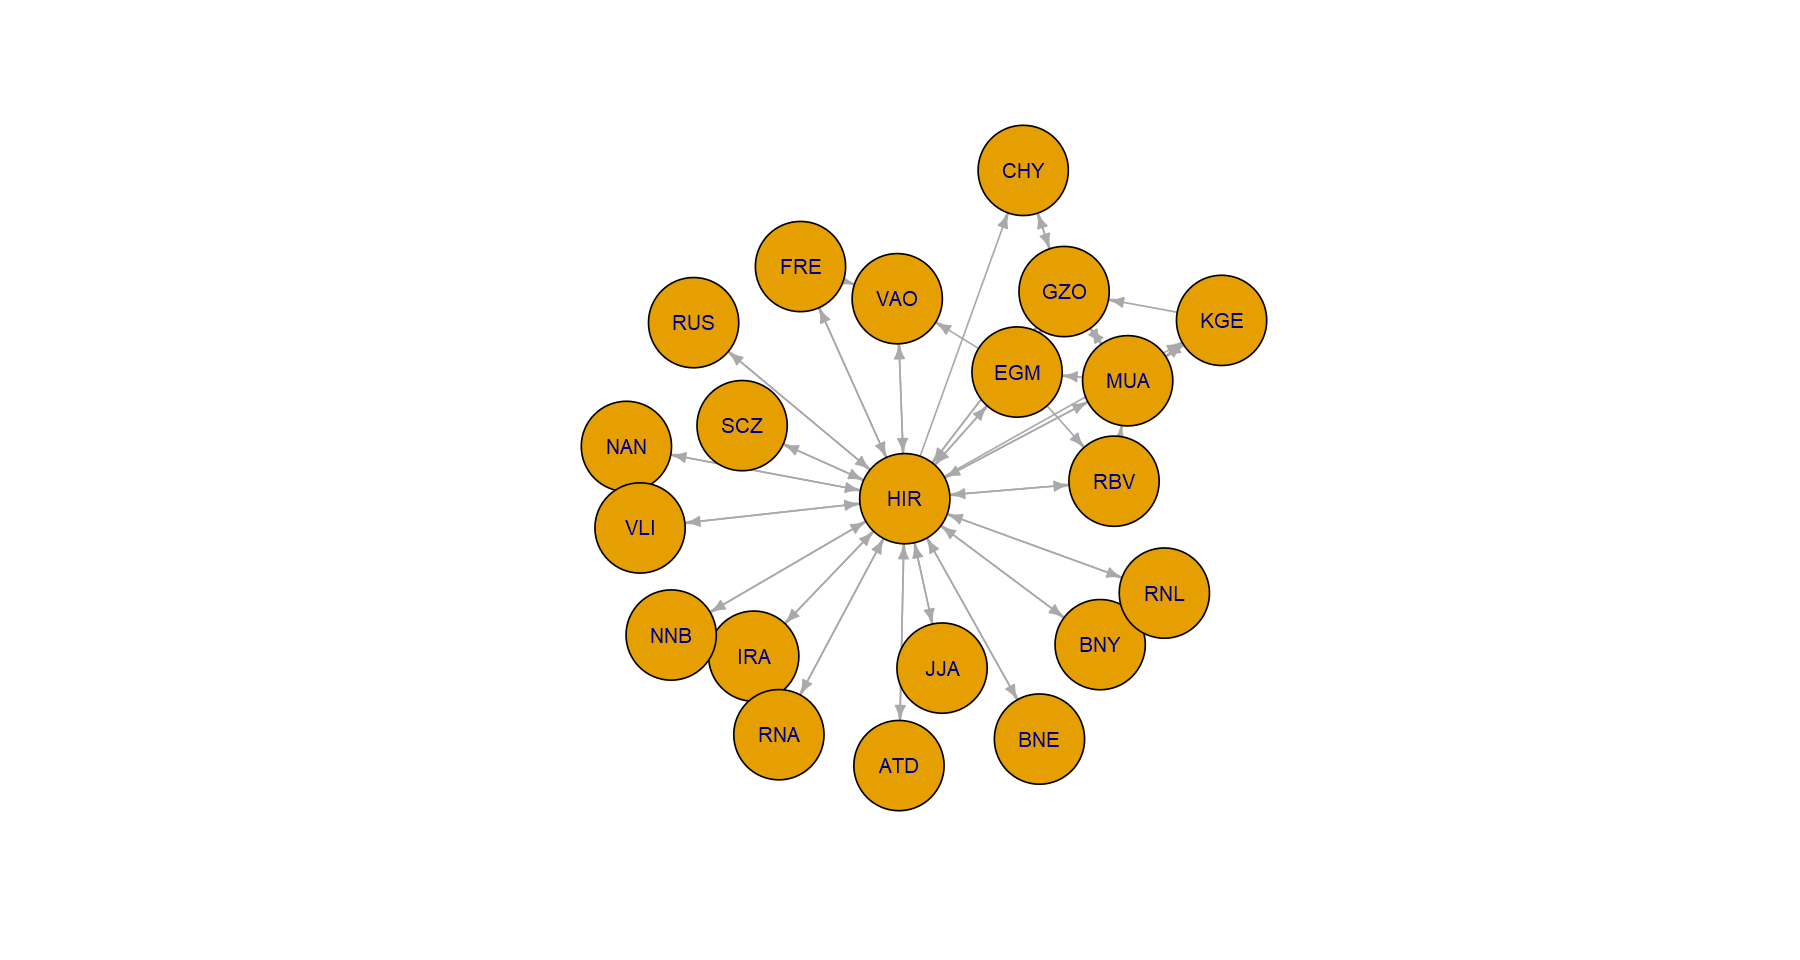

In [20]:
options(repr.plot.width = 15, repr.plot.height =8)

plot(mynet, edge.arrow.size=0.5, vertex.size=30)


## General Measures
 
### Mean Distance

In [16]:
mean_distance(mynet, directed=F)

[1] 1.838095

### Network diameter

In [17]:
diameter(mynet, directed=F,weights=NA)

[1] 2

### Centrality

In [21]:
centr_degree(mynet,mode="in",normalized=T)

$res
 [1]  1  1  2  2  3  1  5 18  3  1  2  4  2  2  2  2  2  1  1  3  2

$centralization
[1] 0.7571429

$theoretical_max
[1] 420

### Connection density

In [22]:
edge_density(mynet,loops=F)

[1] 0.1428571

### Degree (number of connections of a node to other nodes)

In [23]:
degree(mynet)

ATD BNE BNY CHY EGM FRE GZO HIR IRA JJA KGE MUA NAN NNB RBV RNA RNL RUS SCZ VAO 
  2   2   4   3   7   3   9  38   6   2   4   8   4   4   4   4   4   2   2   4 
VLI 
  4

In [24]:
mean(degree(mynet))

[1] 5.714286

## Centrality
 
### Hubs

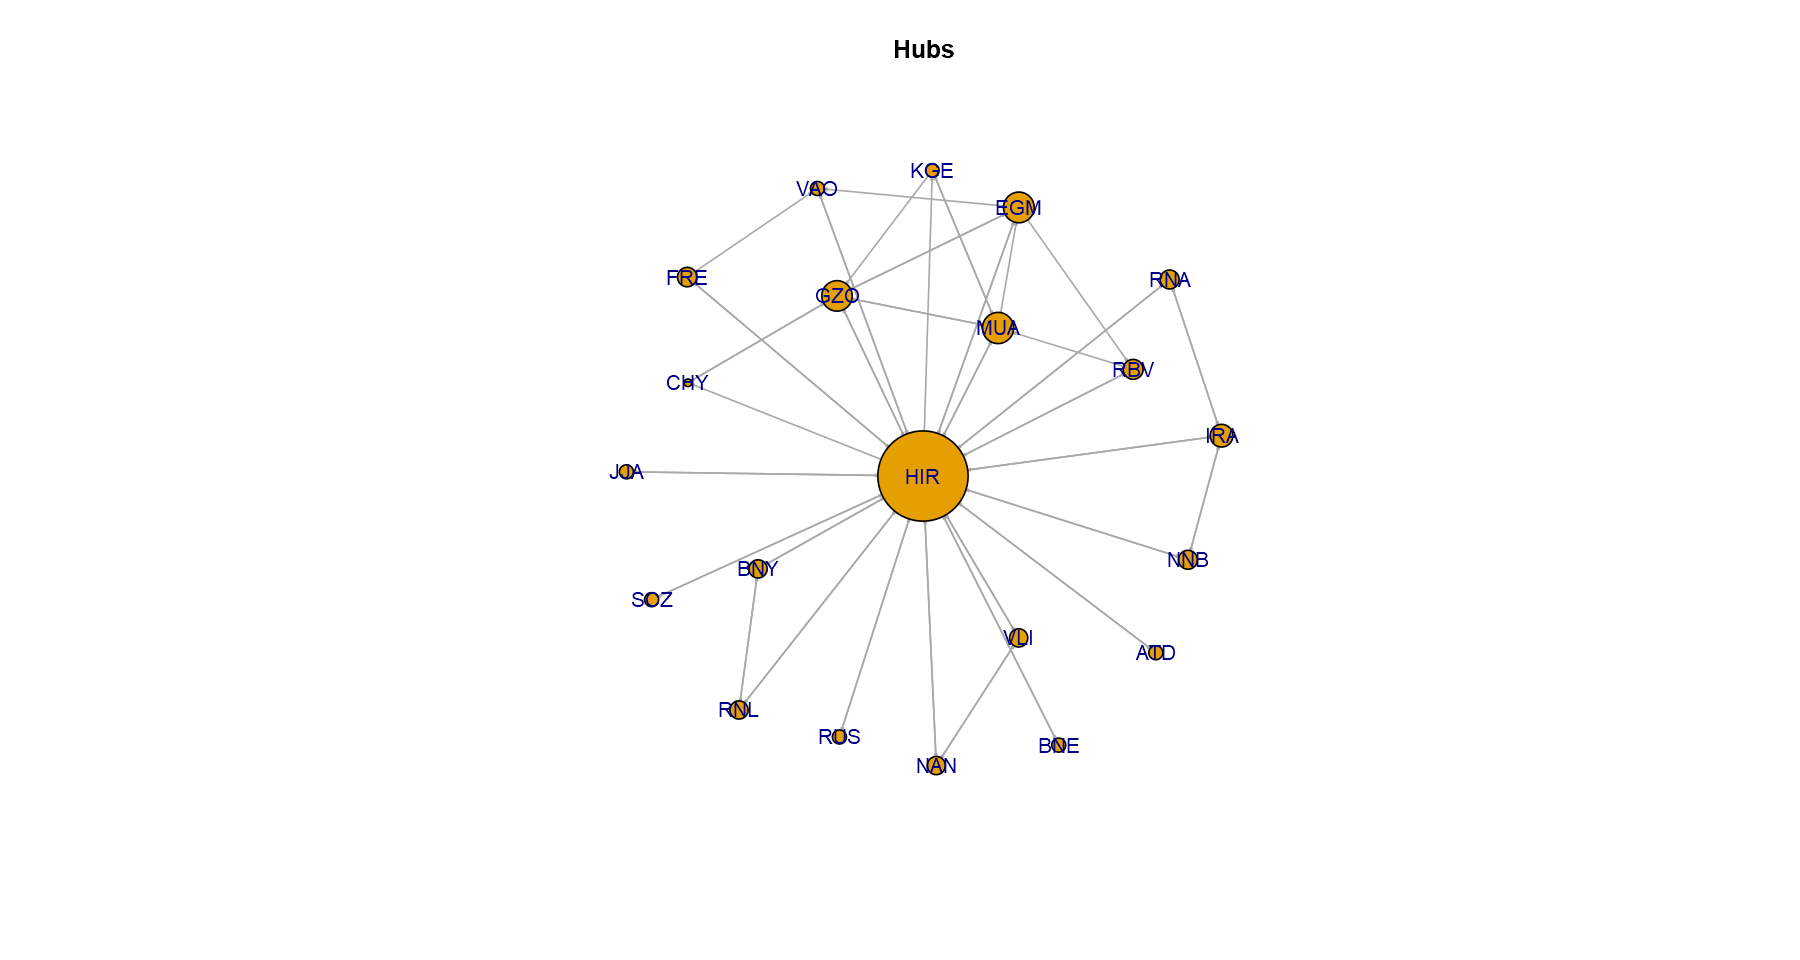

In [25]:
set.seed(11)

hs <- hub_score(mynet)$vector
plot(mynet, vertex.size=hs * 30,main="Hubs",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Authority

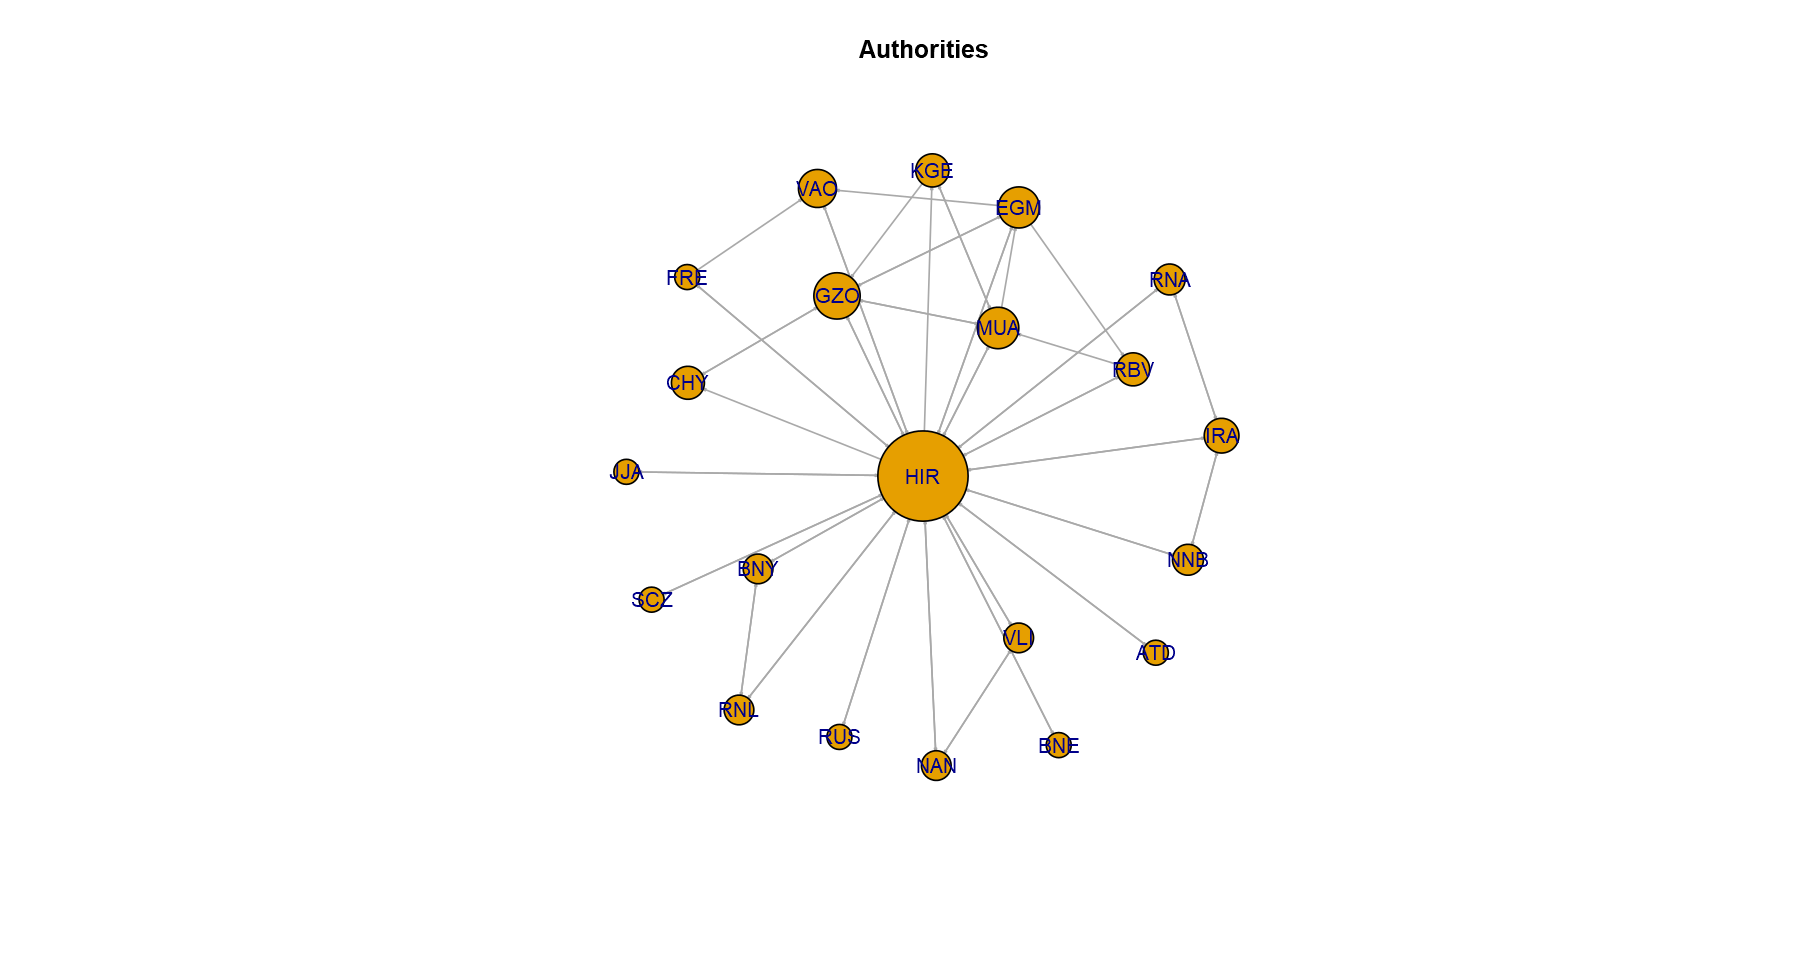

In [26]:
set.seed(11)

au <- authority_score(mynet)$vector
plot(mynet, vertex.size=au * 30,main="Authorities",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Community

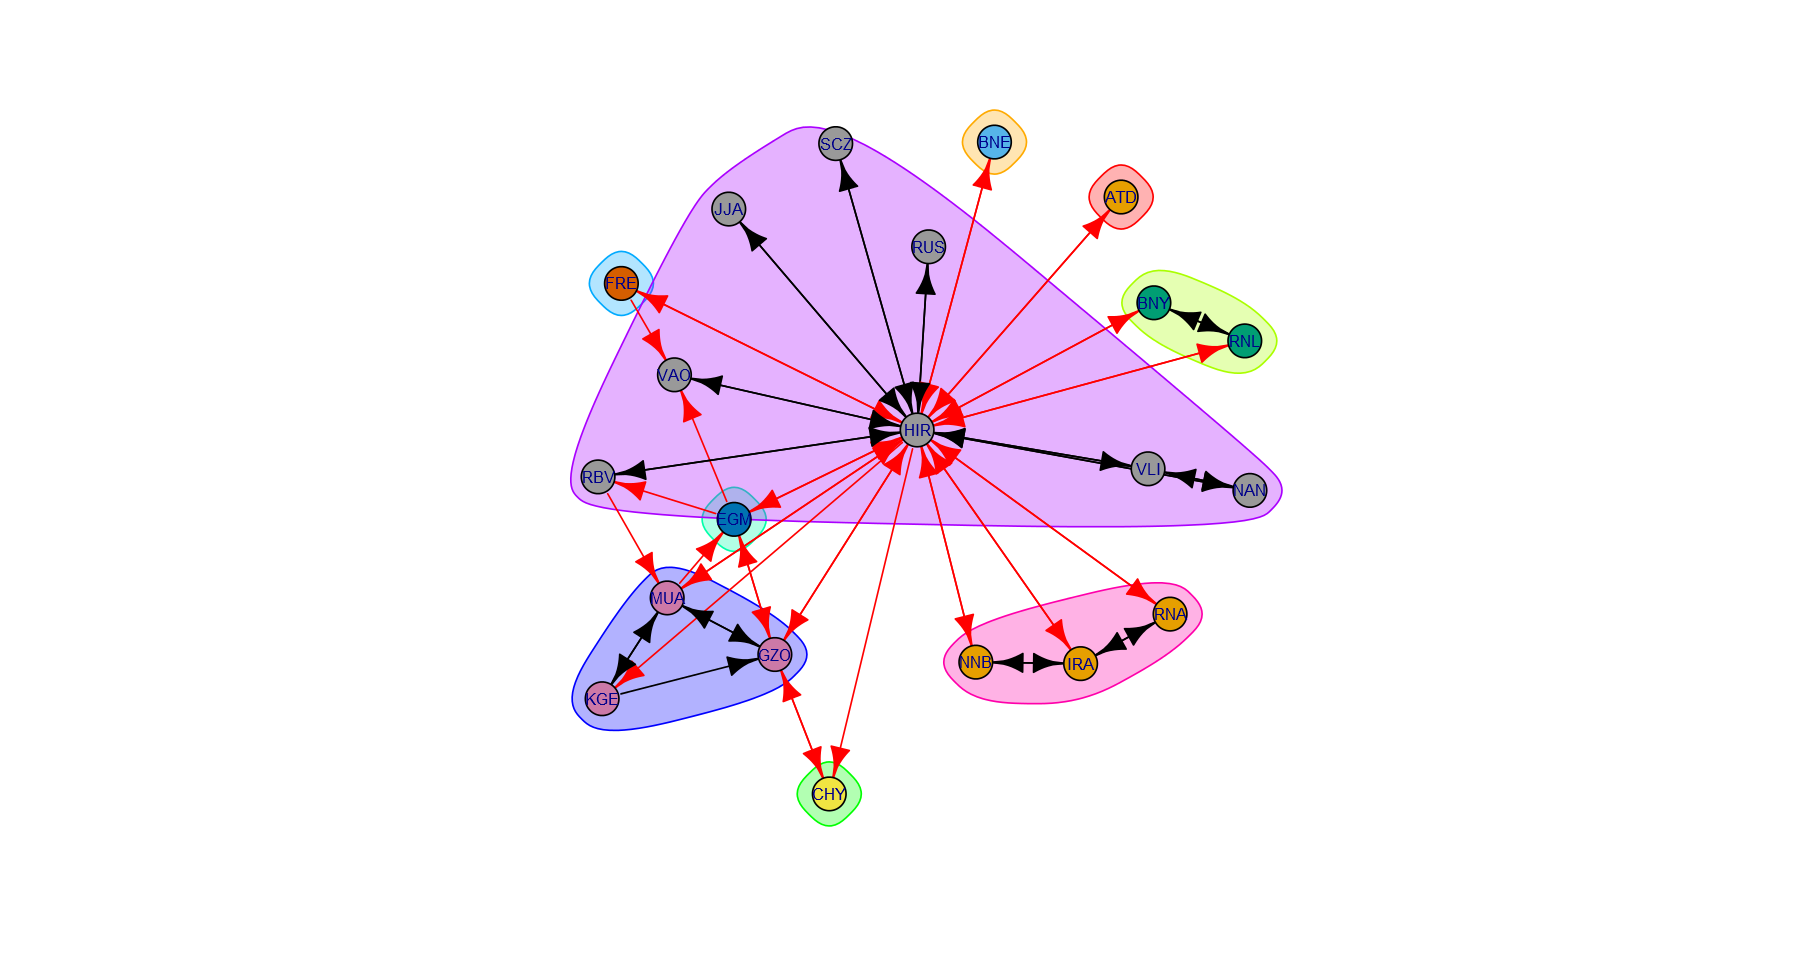

In [27]:
### community
cnet <- cluster_edge_betweenness(mynet)
plot(cnet, mynet, vertex.size=10, vertex.label.cex=0.8)

## Cohesive groups: Cliques and Clusters
 
### Cliques (group of nodes fully connected to each other)

In [28]:
cliques(mynet)

Warning message in cliques(mynet):
"At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations"


[[1]]
+ 1/21 vertex, named, from 7c53dfb:
[1] HIR

[[2]]
+ 1/21 vertex, named, from 7c53dfb:
[1] MUA

[[3]]
+ 2/21 vertices, named, from 7c53dfb:
[1] HIR MUA

[[4]]
+ 1/21 vertex, named, from 7c53dfb:
[1] VAO

[[5]]
+ 2/21 vertices, named, from 7c53dfb:
[1] HIR VAO

[[6]]
+ 1/21 vertex, named, from 7c53dfb:
[1] IRA

[[7]]
+ 2/21 vertices, named, from 7c53dfb:
[1] HIR IRA

[[8]]
+ 1/21 vertex, named, from 7c53dfb:
[1] VLI

[[9]]
+ 2/21 vertices, named, from 7c53dfb:
[1] HIR VLI

[[10]]
+ 1/21 vertex, named, from 7c53dfb:
[1] RNL

[[11]]
+ 2/21 vertices, named, from 7c53dfb:
[1] HIR RNL

[[12]]
+ 1/21 vertex, named, from 7c53dfb:
[1] CHY

[[13]]
+ 2/21 vertices, named, from 7c53dfb:
[1] CHY HIR

[[14]]
+ 1/21 vertex, named, from 7c53dfb:
[1] SCZ

[[15]]
+ 2/21 vertices, named, from 7c53dfb:
[1] HIR SCZ

[[16]]
+ 1/21 vertex, named, from 7c53dfb:
[1] RUS

[[17]]
+ 2/21 vertices, named, from 7c53dfb:
[1] HIR RUS

[[18]]
+ 1/21 vertex, named, from 7c53dfb:
[1] JJA

[[19]]
+ 2/21 vertices, n

In [29]:
sapply(cliques(mynet), length)

Warning message in cliques(mynet):
"At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations"


[1] 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3 2 3 2 1 2 3 2 1 2 3 2 1
[39] 2 3 2 1 2 3 2 1 2 3 2 1 2 3 2 1 2 3 4 3 2 3 2 1 2 3 4 3 2 3 4 3 2 3 2 3 2

In [30]:
largest_cliques(mynet)

Warning message in largest_cliques(mynet):
"At cliques.c:1087 :directionality of edges is ignored for directed graphs"


[[1]]
+ 4/21 vertices, named, from 7c53dfb:
[1] HIR KGE GZO MUA

[[2]]
+ 4/21 vertices, named, from 7c53dfb:
[1] HIR EGM MUA RBV

[[3]]
+ 4/21 vertices, named, from 7c53dfb:
[1] HIR EGM MUA GZO


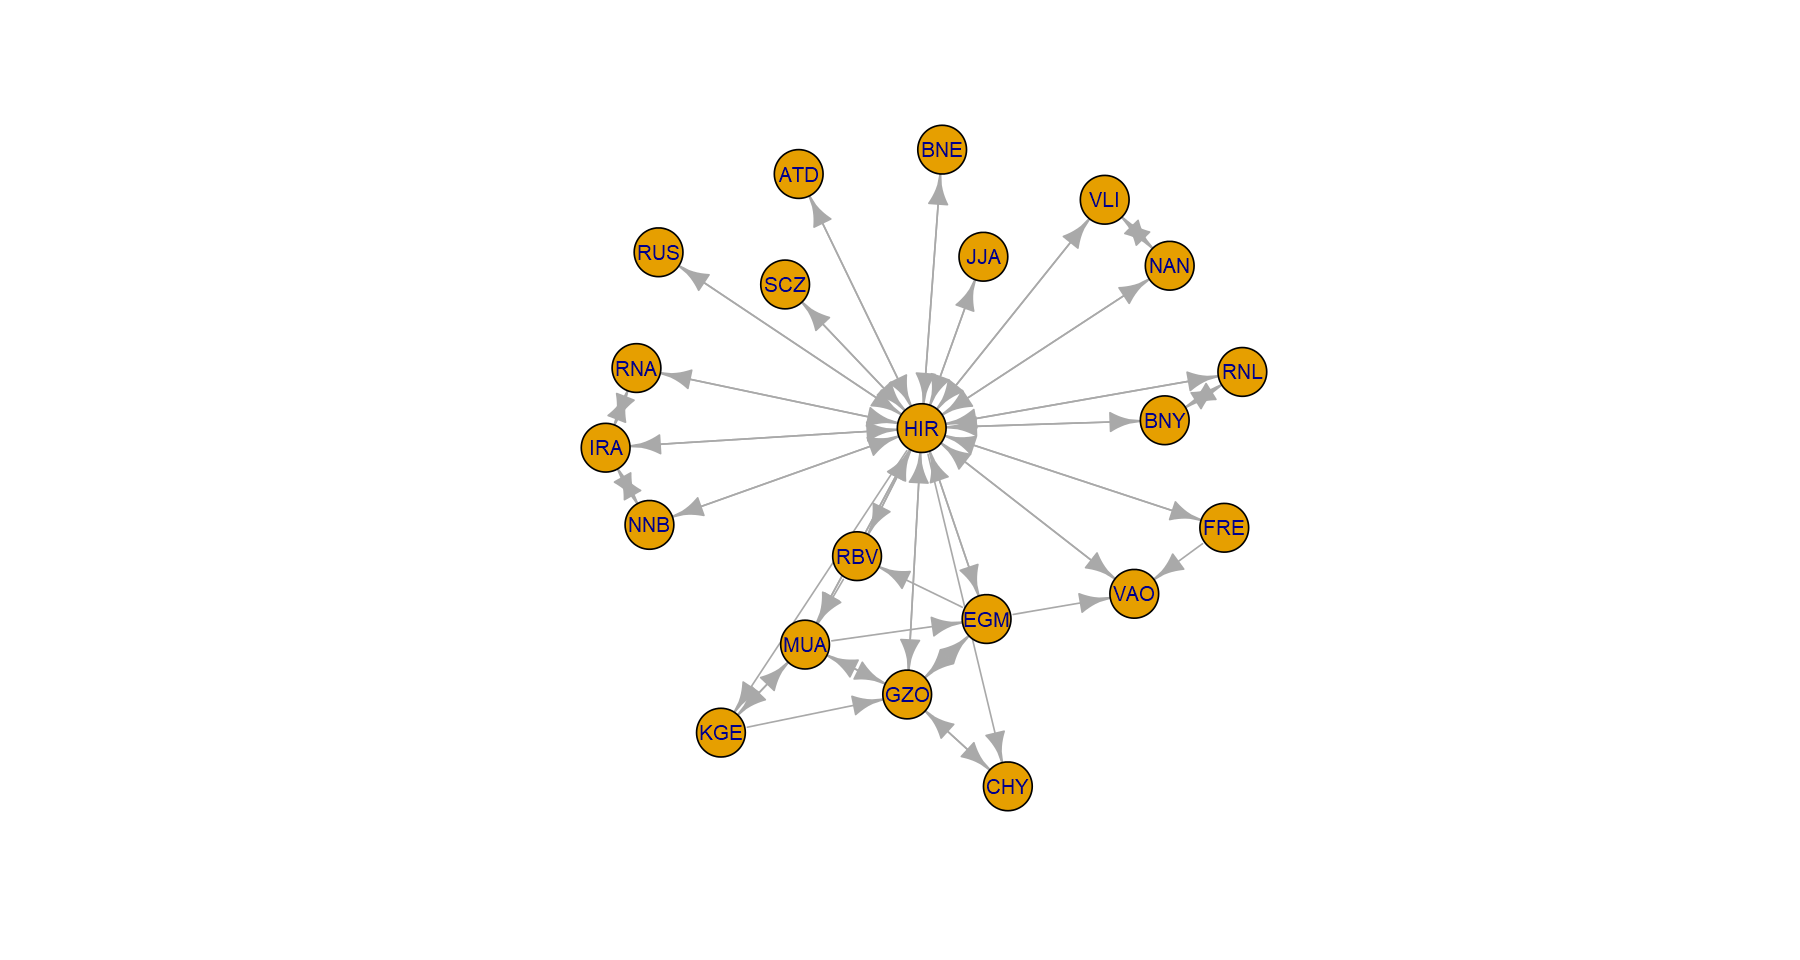

In [31]:
plot(as.directed(mynet))

### Clusters 

In [32]:
btwn <- cluster_edge_betweenness(mynet)
btwn

IGRAPH clustering edge betweenness, groups: 9, mod: 0.15
+ groups:
  $`1`
  [1] "ATD"
  
  $`2`
  [1] "BNE"
  
  $`3`
  [1] "BNY" "RNL"
  
  $`4`
  + ... omitted several groups/vertices

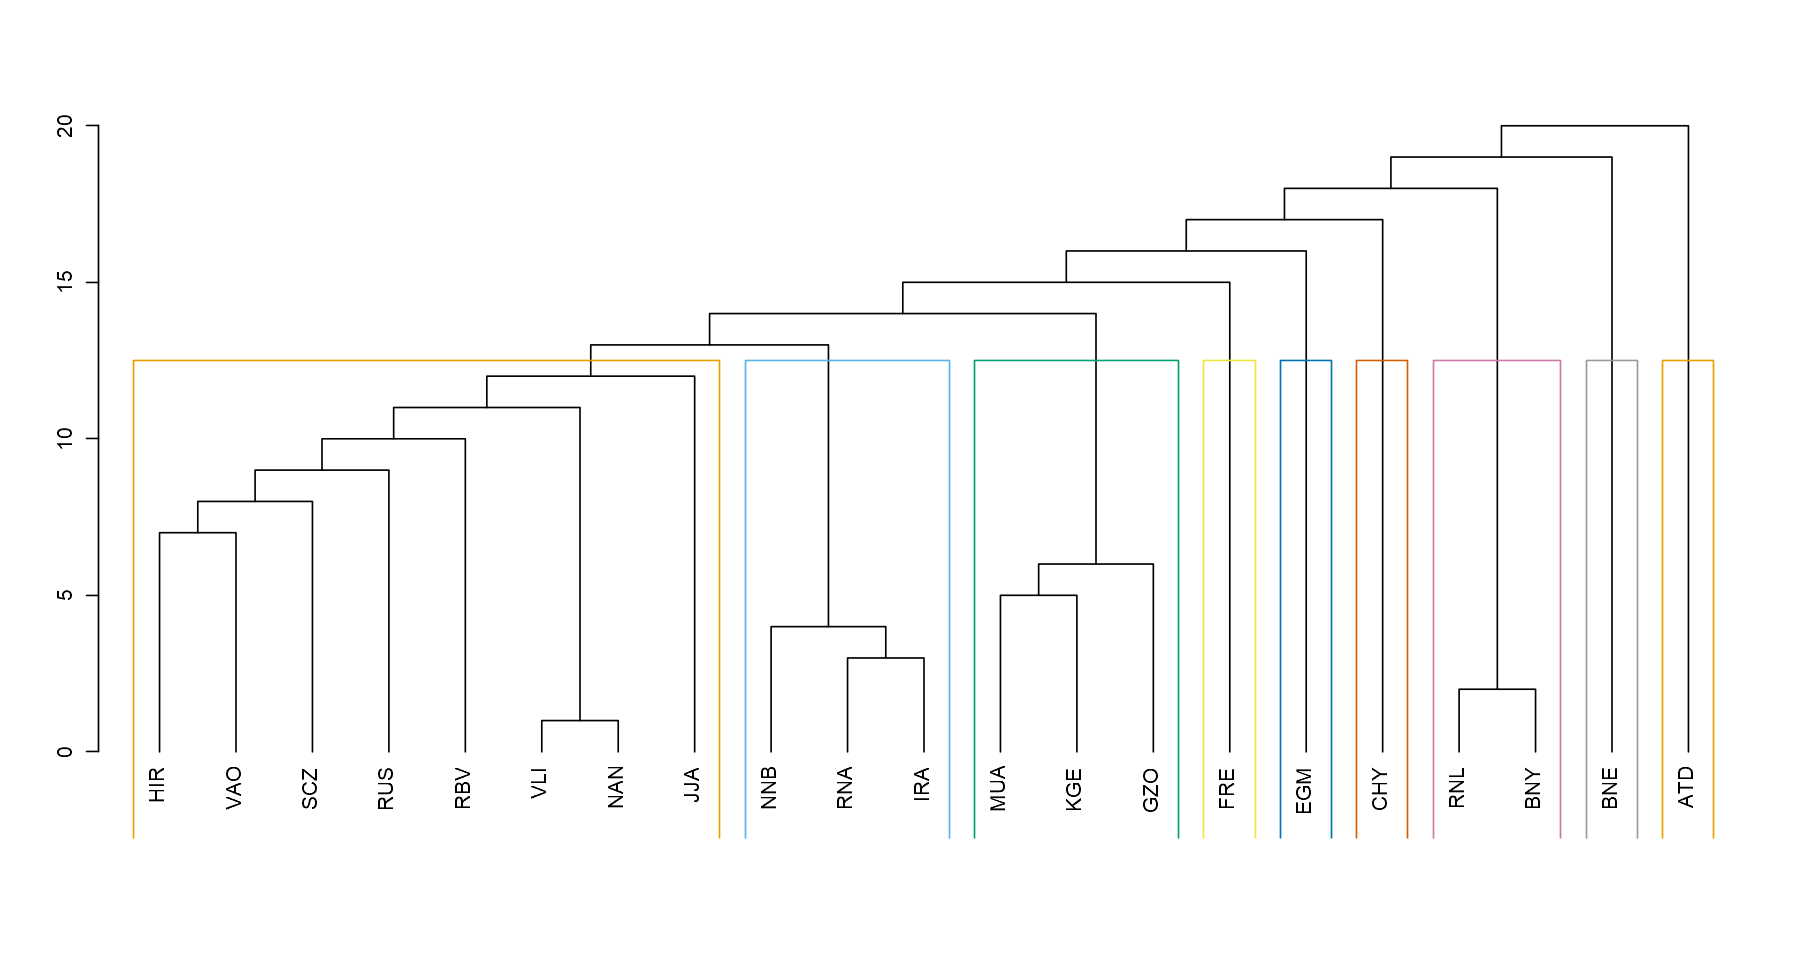

In [33]:
dendPlot(btwn, mode="hclust")

In [34]:
length(btwn)

[1] 9

In [35]:
membership(btwn)

ATD BNE BNY CHY EGM FRE GZO HIR IRA JJA KGE MUA NAN NNB RBV RNA RNL RUS SCZ VAO 
  1   2   3   4   5   6   7   8   9   8   7   7   8   9   8   9   3   8   8   8 
VLI 
  8 